In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
players<- read_csv("players.csv") 
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [5]:
mean_by_experience <- players |>  
group_by(experience) |> 
summarize("average hours played" = mean(played_hours,na.rm = TRUE), "average age" = mean(Age,na.rm = TRUE))
mean_by_experience

mean<- players |>  
summarize("average hours played" = mean(played_hours,na.rm = TRUE), "average age" = mean(Age,na.rm = TRUE))
mean


experience,average hours played,average age
<chr>,<dbl>,<dbl>
Amateur,6.0174603,21.36508
Beginner,1.2485714,21.65714
Pro,2.6000000,16.92308
Regular,18.2083333,22.02857
Veteran,0.6479167,20.95833


average hours played,average age
<dbl>,<dbl>
5.845918,21.13918


In [6]:
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, 
and how do these features differ between various player types?
Specific question: “Can time spent on the game and a persons skill level be used to predict whether or not they 
would subscribe to a game-related newsletter, using the players dataset?”

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected numeric constant
1: Question 1
             ^


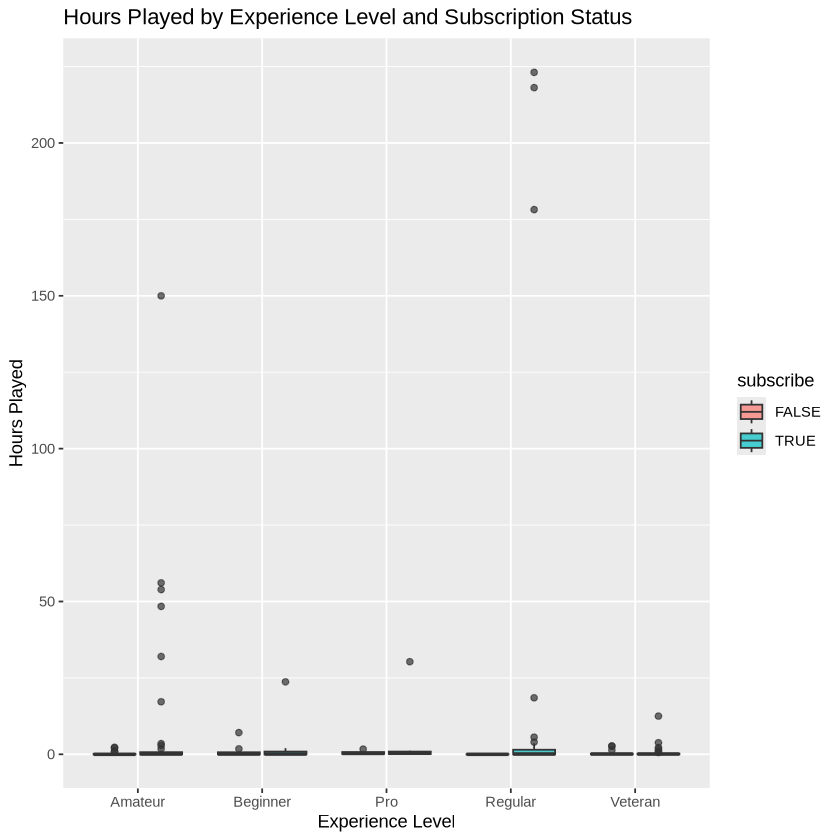

In [7]:
visual_plot<- players|>
ggplot(aes(x = experience, y = played_hours, fill = subscribe)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Hours Played by Experience Level and Subscription Status",
    x = "Experience Level",
    y = "Hours Played")
visual_plot

In [8]:
sessions<- read_csv("sessions.csv")|>
select(hashedEmail, start_time, end_time)

sessions_tidy <- sessions |>
  mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
        end_time   = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
minutes_played = as.numeric(end_time - start_time, units = "mins"))

sessions_tidy



Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,minutes_played
<chr>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,122
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,9
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,17
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,18


In [9]:
combined_data<- players |> 
  left_join(sessions_tidy, by = "hashedEmail")|>
group_by(hashedEmail, name, gender, Age, experience, subscribe, played_hours) |>
  summarise(
    total_minutes = sum(minutes_played, na.rm = TRUE),
    avg_minutes = mean(minutes_played, na.rm = TRUE),
    n_sessions = n()
  ) 

combined_data

`summarise()` has grouped output by 'hashedEmail', 'name', 'gender', 'Age',
'experience', 'subscribe'. You can override using the `.groups` argument.


hashedEmail,name,gender,Age,experience,subscribe,played_hours,total_minutes,avg_minutes,n_sessions
<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Isaac,Male,20,Regular,TRUE,1.5,106,53.00000,2
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Frankie,Male,17,Veteran,TRUE,0.0,0,NaN,1
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Lyra,Male,21,Pro,FALSE,0.4,30,30.00000,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Osiris,Male,17,Beginner,TRUE,0.1,11,11.00000,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Winslow,Male,17,Regular,TRUE,5.6,418,32.15385,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Knox,Male,17,Pro,TRUE,1.0,70,35.00000,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Callum,Male,19,Veteran,FALSE,0.1,10,10.00000,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Hugo,Female,21,Amateur,TRUE,0.7,50,50.00000,1
11bf6125c4264b3a8f3bffa57b33bd598e2ea1ecd6331ad3bc54aa88e22db035,Olivia,Female,23,Amateur,FALSE,0.0,0,NaN,1


In [29]:
#arrange skill level from left to right for the plot
combined_data <- combined_data |>
  mutate(
    experience = factor(
      experience,
      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")
    )
  )

`summarise()` has grouped output by 'experience', 'played_hours'. You can
override using the `.groups` argument.


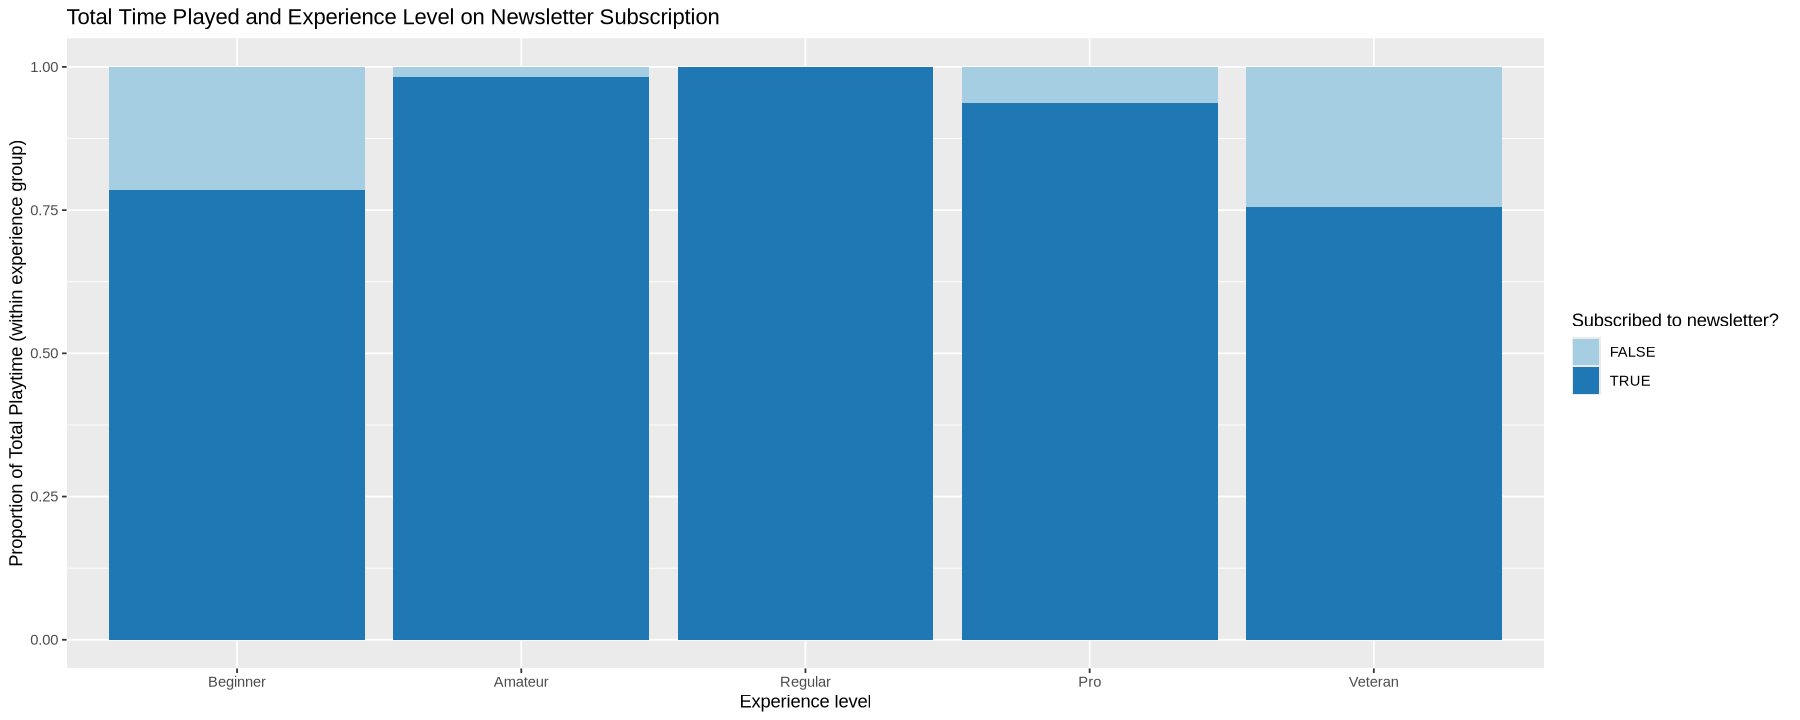

In [37]:
plotted_combined_data <- combined_data |> 
group_by(experience, played_hours, subscribe) |>
summarise(total_hours = sum(played_hours, na.rm = TRUE))|>
ggplot(aes(x = experience, y = total_hours, fill = subscribe)) + 
geom_bar(stat = "identity", position = "fill") + 
scale_fill_brewer(palette = "Paired") +
labs(title = "Total Time Played and Experience Level on Newsletter Subscription", x = "Experience level", y = "Proportion of Total Playtime (within experience group)", fill = "Subscribed to newsletter?")
plotted_combined_data
options(repr.plot.width = 25, repr.plot.height = 6)
